In [1]:
import cv2
import argparse
import imutils
import time
import scipy.io
# from sklearn.svm import SVC
import skvideo.io
# from sklearn.decomposition import PCA
# from sklearn.manifold import Isomap
# from sklearn.manifold import LocallyLinearEmbedding
# from sklearn.kernel_approximation import Nystroem
from scipy.ndimage import morphology as mp
from skimage.feature import canny
from thundersvm import SVC
from random import sample
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction import image
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt
import mahotas
from imutils.video import VideoStream
from imutils.video import FPS
import os
import pickle
import copy

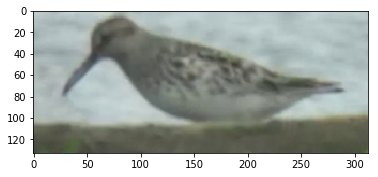

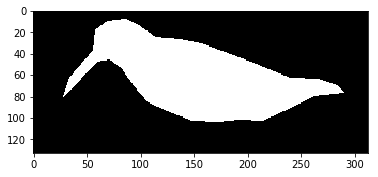

In [5]:
label=56
basepath = "training/"+str(label)+"/"
loadpath = basepath+"train/"
f1 = "Aa34JFJDP2o"
img = cv2.imread(loadpath+f1+'-1-frame.png');
# im_max = max(img.flatten())
# im_min = min(img.flatten())
# img = (img - im_min)/(im_max - im_min)
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
imgHSV=imgHSV[:,:,0]
sil = cv2.imread(loadpath+f1+'-1-gt.png');
# sil = cv2.cvtColor(sil, cv2.COLOR_BGR2HSV)
# sil=sil[:,:,0]
# [m,n] = img.shape
# [m1,n1] = sil.shape
# a=0
# b=0
# if(m1<m):
#     a = m 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img),plt.show();
plt.imshow(sil*255),plt.show();
# cv2.imshow("Img",img);
# cv2.imshow("Sil",sil);
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [6]:
mask2 = sil.astype(np.bool)
silhouette = np.zeros_like(img)
silhouette[mask2] = img[mask2]

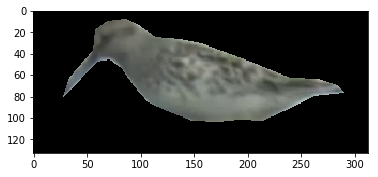

In [7]:
plt.imshow(silhouette),plt.show();

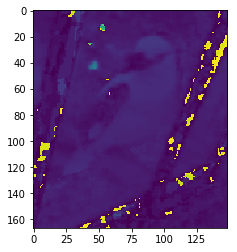

In [23]:
plt.imshow(imgHSV),plt.show();

In [3]:
cv2.imshow("Img",imgHSV);

# cv2.imshow("Sil",sil);
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
patches=[]
GT=[]
X=[]
Y=[]

In [6]:
len(patches)

0

In [7]:
len(X)

0

In [8]:

psize=8
# patches = image.extract_patches_2d(img, (psize, psize))
patches = image.extract_patches_2d(imgHSV, (psize, psize))
GT = image.extract_patches_2d(sil, (psize, psize))
i=0;
print("Total Patches:"+str(len(patches)));
while i < len(patches):
# for i in range(len(patches)):
    a = patches[i].flatten()
#     a = (a - im_min)/(im_max - im_min)
    if(np.count_nonzero(GT[i])>=(psize*psize/2)):
        Y.append(1)
    else:
        Y.append(0)

    X.append(a)
    i=i+1


Total Patches:22720


In [4]:
X[0]

array([0.42561983, 0.45867769, 0.41735537, 0.41322314, 0.45867769,
       0.41322314, 0.41322314, 0.45867769, 0.41322314, 0.40909091,
       0.45454545, 0.40909091, 0.40495868, 0.45041322, 0.40495868,
       0.40495868, 0.45041322, 0.40495868, 0.40495868, 0.45041322,
       0.40495868, 0.40082645, 0.44628099, 0.40082645, 0.4214876 ,
       0.45454545, 0.41322314, 0.4214876 , 0.46694215, 0.4214876 ,
       0.41322314, 0.45867769, 0.41322314, 0.41322314, 0.45867769,
       0.41322314, 0.40909091, 0.45454545, 0.40909091, 0.40909091,
       0.45454545, 0.40909091, 0.40909091, 0.45454545, 0.40909091,
       0.40495868, 0.45041322, 0.40495868, 0.4214876 , 0.45454545,
       0.41322314, 0.4214876 , 0.46694215, 0.4214876 , 0.4214876 ,
       0.46694215, 0.4214876 , 0.41735537, 0.46280992, 0.41735537,
       0.41322314, 0.45867769, 0.41322314, 0.40909091, 0.45454545,
       0.40909091, 0.40909091, 0.45454545, 0.40909091, 0.40495868,
       0.45041322, 0.40495868, 0.42975207, 0.46280992, 0.42148

In [12]:
ones = np.where(Y)[0]
num1 = int(0.8*len(ones))
zeroes = np.where(np.array(Y)==0)[0]
num2 = int(0.8*len(zeroes))
print(str(num1)+'/'+str(len(ones)))
print(str(num2)+'/'+str(len(zeroes)))

samp1 = sample(ones.tolist(),num1)
samp2 = sample(zeroes.tolist(),num2)

train_indices = np.array(samp1 + samp2)

test_X = np.delete(np.array(X),train_indices,axis=0)
test_Y = np.delete(Y,train_indices)
train_Y = np.array(Y)[train_indices.astype(int)]
train_X = np.array(X)[train_indices.astype(int)]

7872/9840
17299/21624


In [13]:
svc = SVC(C=1,kernel='rbf',gamma=1/(train_X[0].shape[0]*np.array(train_X).var()))
svc.fit(train_X,train_Y)

SVC(C=1, cache_size=None, class_weight={}, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=1.3724272190215656e-06,
  gpu_id=0, kernel='rbf', max_iter=-1, max_mem_size=-1, n_jobs=-1,
  probability=False, random_state=None, shrinking=False, tol=0.001,
  verbose=False)

In [7]:
svc.save_to_file("training/"+str(label)+"/dualvids_svc.pkl")

In [8]:
f = open("training/"+str(label)+"/trainX.pkl","wb")
pickle.dump(train_X,f)
f.close()
f = open("training/"+str(label)+"/trainy.pkl","wb")
pickle.dump(train_Y,f)
f.close()
f = open("training/"+str(label)+"/testX.pkl","wb")
pickle.dump(test_X,f)
f.close()
f = open("training/"+str(label)+"/testY.pkl","wb")
pickle.dump(test_Y,f)
f.close()

In [9]:
svc = SVC(C=1,kernel='rbf',gamma=1/(X[0].shape[0]*np.array(X).var()))
svc.fit(X,Y)

SVC(C=1, cache_size=None, class_weight={}, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=2.7943653674620742e-05,
  gpu_id=0, kernel='rbf', max_iter=-1, max_mem_size=-1, n_jobs=-1,
  probability=False, random_state=None, shrinking=False, tol=0.001,
  verbose=False)

In [6]:
svc

SVC(C=1, cache_size=None, class_weight={}, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=6.189740517262803e-06,
  gpu_id=0, kernel='rbf', max_iter=-1, max_mem_size=-1, n_jobs=-1,
  probability=False, random_state=None, shrinking=False, tol=0.001,
  verbose=False)

In [19]:
def undesired_objects (image):
    image = image.astype('uint8')
    nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(image, connectivity=4)
    sizes = stats[:, -1]

    max_label = 1
    max_size = sizes[1]
    for i in range(2, nb_components):
        if sizes[i] > max_size:
            max_label = i
            max_size = sizes[i]

#     img2 = np.zeros(output.shape)
#     img2[output == max_label] = 255
#     plt.imshow(img2),plt.show();
    img2 = np.zeros(output.shape)
    img2[output == max_label] = 1
    return img2
#     cv2.imshow("Biggest component", img2)
#     cv2.waitKey()

Frame:1


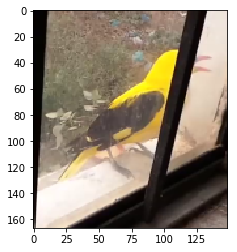

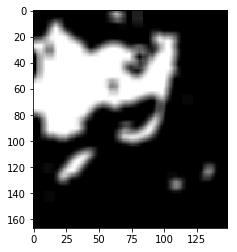

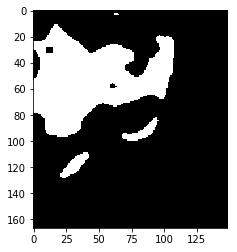

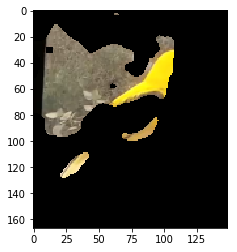

In [10]:
##### Testing for stride 1 ########
basepath = "training/"+str(label)+"/"
loadpath = basepath+"test/"
storepath = basepath+"output/"
if not os.path.exists(storepath):
    os.mkdir(storepath)
for n in range(1,2):
    print("Frame:"+str(n));
    next_img = cv2.imread(loadpath+'next_frame'+str(n)+'.png');
#     next_img = cv2.imread(loadpath+'dpzEbJqrpGU_55'+'.png');
#     next_img = (next_img - np.mean(next_img))/np.std(next_img)
#     # delete zero columns
#     next_img= np.delete(next_img,np.where(~next_img.any(axis=0))[0], axis=1)
#     # delete zero rows
#     next_img= np.delete(next_img,np.where(~next_img.any(axis=1))[0], axis=0)
#     im_max = max(next_img.flatten())
#     im_min = min(next_img.flatten())
#     next_img = (next_img - im_min)/(im_max - im_min)
    next_img_hsv = cv2.cvtColor(next_img, cv2.COLOR_BGR2HSV)
    next_img = cv2.cvtColor(next_img, cv2.COLOR_BGR2RGB)
    next_img_hsv = next_img_hsv[:,:,0]
    plt.imshow(next_img),plt.show();
    
    next_patches2 = image.extract_patches_2d(next_img, (psize, psize))
    next_patches = image.extract_patches_2d(next_img_hsv, (psize, psize))
    TEST=[]
    for i in range(len(next_patches)):
        a = next_patches[i].flatten()
        TEST.append(a)
    predictions = svc.predict(TEST)
    mask = np.zeros_like(next_patches2)
    for i in range(len(predictions)):
        if(predictions[i]==1):
            mask[i] = mask[i] + 1
    ## Using thresholding on the image
    reconstructed = []
    reconstructed = image.reconstruct_from_patches_2d(mask, next_img.shape)
    plt.imshow(reconstructed),plt.show();
    ret,thresh1 = cv2.threshold(reconstructed,0.6,1,cv2.THRESH_BINARY)
    plt.imshow(thresh1),plt.show();
    
    mask2 = thresh1.astype(np.bool)
    silhouette = np.zeros_like(next_img)
    silhouette[mask2] = next_img[mask2]
    
    ## Using maximally connected components on the image
#     reconstructed = []
#     reconstructed = image.reconstruct_from_patches_2d(mask, next_img.shape)
#     plt.imshow(reconstructed),plt.show();
#     mask2 = reconstructed.astype(np.bool)
#     silhouette = np.zeros_like(next_img)
#     silhouette[mask2] = next_img[mask2]
    
#     gray_sil = cv2.cvtColor(silhouette, cv2.COLOR_BGR2GRAY)
#     connected_mask = undesired_objects(gray_sil)
#     stacked_img = np.stack((connected_mask,)*3, axis=-1)
    
#     plt.imshow(stacked_img),plt.show();
    
#     mask = stacked_img.astype(np.bool)
#     silhouette = np.zeros_like(next_img)
#     silhouette[mask] = next_img[mask]
    
    plt.imshow(silhouette),plt.show();
    cv2.imwrite(storepath+'silhouette_frame'+str(n)+'.png',silhouette);
#     cv2.imwrite(storepath+'dpzEbJqrpGU_55'+'.png',silhouette);

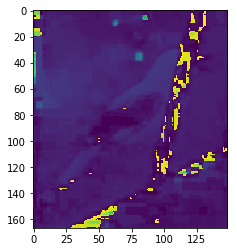

In [14]:
plt.imshow(next_img_hsv),plt.show();

In [13]:
cv2.imshow("Img",next_img_hsv);

# cv2.imshow("Sil",sil);
cv2.waitKey(0)
cv2.destroyAllWindows()

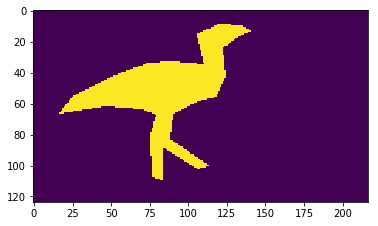

True

In [11]:
############## Mark new points ######################

storepath = "training/"+str(label)+"/train/"
if not os.path.exists(storepath):
    os.mkdir(storepath)

corners=[]

def mouse_click(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        corners.append([x,y])

        for i in corners:
            [x,y] = i
            cv2.circle(img2,(x,y),3,255,-1)
        

cv2.namedWindow('Frame')
cv2.setMouseCallback("Frame", mouse_click)

img2 = copy.copy(img)
while True:
    key = cv2.waitKey(1) or 0xff
    cv2.imshow('Frame',img2)
    # if the `q` key was pressed, break from the loop
    if key == ord("q"):
        break

# close all windows
cv2.destroyAllWindows()

mask = np.zeros((img.shape[0], img.shape[1]))
cv2.fillPoly(mask, [np.array(corners)], 1)
plt.imshow(mask),plt.show()

cv2.imwrite(storepath+'gt1.png',mask)
mask = mask.astype(np.bool)
silhouette = np.zeros_like(img)
silhouette[mask] = img[mask]
cv2.imwrite(storepath+'extracted_silhouette1.png',silhouette)

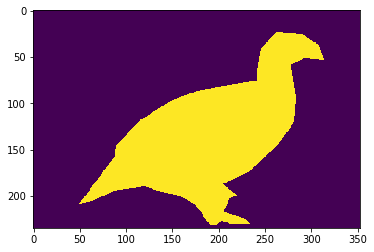

(<matplotlib.image.AxesImage at 0x7fb7b7b0c518>, None)

In [25]:
mask = np.zeros((img.shape[0], img.shape[1]))
cv2.fillPoly(mask, [np.array(corners)], 1)
plt.imshow(mask),plt.show()

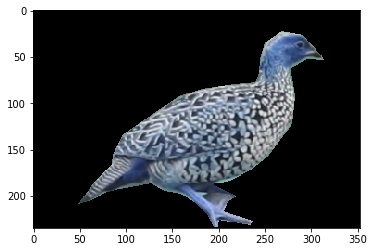

(<matplotlib.image.AxesImage at 0x7fb7b7a71470>, None)

In [33]:
mask = mask.astype(np.bool)
silhouette = np.zeros_like(img)
silhouette[mask] = img[mask]
plt.imshow(silhouette),plt.show()

In [34]:
cv2.imwrite(storepath+'extracted_silhouette1.png',silhouette)

True

In [31]:
silhouette

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [5]:
svc=SVC()

In [6]:
svc.load_from_file("output/40/"+"vid2_svc.pkl")

In [22]:
svc.shrinking

False

In [7]:
output = svc.predict(test_X)

In [38]:
orig_score = accuracy_score(test_Y,output)

In [39]:
orig_score

0.9950567209582356

In [11]:
sv = svc.support_vectors_

In [33]:
sv.shape

(1813, 193)

In [17]:
len(sv)

1813

In [32]:
indices = []

In [40]:
for i in range(858,len(sv)):
    print(i)
    svc.support_vectors_ = np.delete(sv,i,0)

    prediction = svc.predict(test_X)
    score = accuracy_score(test_Y,prediction)

    if orig_score - score <= 2:
        print(orig_score - score)
        indices.append(i)

858
0.0
859
0.0
860
0.0
861
0.0
862
0.0
863
0.0
864
0.0
865
0.0
866
0.0
867
0.0
868
0.0
869
0.0
870
0.0
871
0.0
872
0.0
873
0.0
874
0.0
875
0.0
876
0.0
877
0.0
878
0.0
879
0.0
880
0.0
881
0.0
882
0.0
883
0.0
884
0.0
885
0.0
886
0.0
887
0.0
888
0.0
889
0.0
890
0.0
891
0.0
892
0.0
893
0.0
894
0.0
895
0.0
896
0.0
897
0.0
898
0.0
899
0.0
900
0.0
901
0.0
902
0.0
903
0.0
904
0.0
905
0.0
906
0.0
907
0.0
908
0.0
909
0.0
910
0.0
911
0.0
912
0.0
913
0.0
914
0.0
915
0.0
916
0.0
917
0.0
918
0.0
919
0.0
920
0.0
921
0.0
922
0.0
923
0.0
924
0.0
925
0.0
926
0.0
927
0.0
928
0.0
929
0.0
930
0.0
931
0.0
932
0.0
933
0.0
934
0.0
935
0.0
936
0.0
937
0.0
938
0.0
939
0.0
940
0.0
941
0.0
942
0.0
943
0.0
944
0.0
945
0.0
946
0.0
947
0.0
948
0.0
949
0.0
950
0.0
951
0.0
952
0.0
953
0.0
954
0.0
955
0.0
956
0.0
957
0.0
958
0.0
959
0.0
960
0.0
961
0.0
962
0.0
963
0.0
964
0.0
965
0.0
966
0.0
967
0.0
968
0.0
969
0.0
970
0.0
971
0.0
972
0.0
973
0.0
974
0.0
975
0.0
976
0.0
977
0.0
978
0.0
979
0.0
980
0.0
981
0.0
982
0.0


0.0
1785
0.0
1786
0.0
1787
0.0
1788
0.0
1789
0.0
1790
0.0
1791
0.0
1792
0.0
1793
0.0
1794
0.0
1795
0.0
1796
0.0
1797
0.0
1798
0.0
1799
0.0
1800
0.0
1801
0.0
1802
0.0
1803
0.0
1804
0.0
1805
0.0
1806
0.0
1807
0.0
1808
0.0
1809
0.0
1810
0.0
1811
0.0
1812
0.0


In [36]:
len(indices)

814

In [41]:
from sklearn import linear_model
clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(train_X, train_Y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [44]:
prediction = clf.predict(test_X)

In [45]:
accuracy_score(test_Y,prediction)

0.974649851067875